<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-2/Problem_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

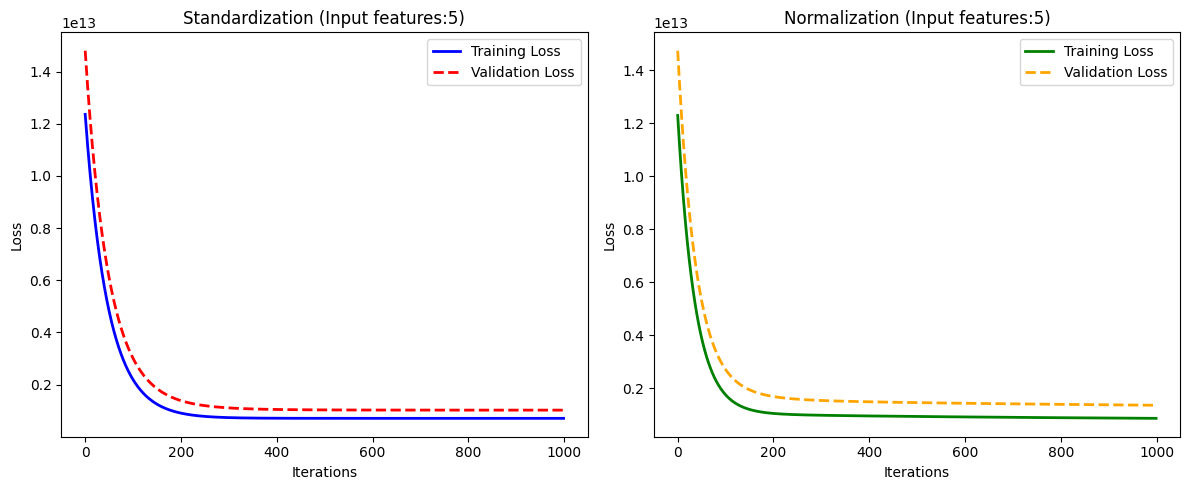

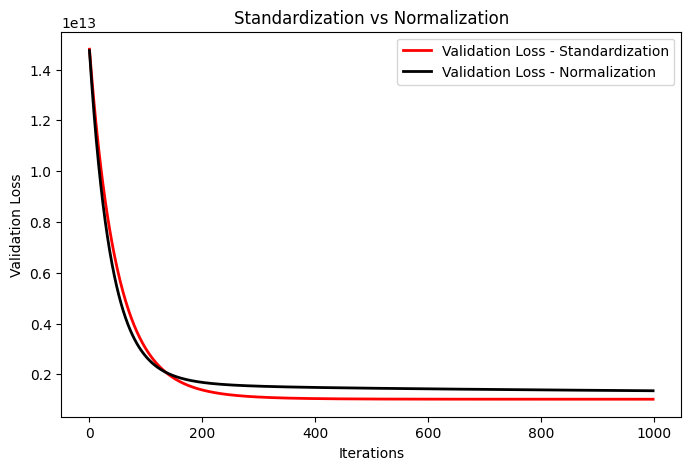


For Standardization
Learning Rate: 0.01
Final Training Loss: 706178290528.76
Final Validation Loss: 1020939633385.53
Theta values: [4690108.49966251  649252.8851038   102317.43840596  535235.90314547
  506201.37097095  364148.03886476]

Parameters:
Theta_0: 4690108.50
area (theta_1): 649252.89
bedrooms (theta_2): 102317.44
bathrooms (theta_3): 535235.90
stories (theta_4): 506201.37
parking (theta_5): 364148.04

For Normalization
Learning Rate: 0.01
Final Training Loss: 860502921633.37
Final Validation Loss: 1354434872723.79
Theta values: [2940778.0857404  1559156.93981718 1429258.25095695 1121443.94968517
 1557883.52469423 1440517.26888813]

Parameters:
Theta_0: 2940778.09
area (theta_1): 1559156.94
bedrooms (theta_2): 1429258.25
bathrooms (theta_3): 1121443.95
stories (theta_4): 1557883.52
parking (theta_5): 1440517.27


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# For HW2, we're using housing dataset as per instruction.
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
h_data = pd.read_csv(url)

# I've defined i/p and o/p for this problem
X_in = h_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_out = h_data['price'].values.reshape(-1, 1) #It converts the output as a 1D array with m=5 rows

# I've splitted the dataset into traning (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_in, y_out, test_size=0.2, random_state=80)

# I've added standardization & normalization
def standardize_features(X_train, X_val):
    X_mean = X_train.mean(axis=0)
    X_std = X_train.std(axis=0)
    X_std[X_std == 0] = 1  # Avoid division by zero
    X_train_std = (X_train - X_mean) / X_std
    X_val_std = (X_val - X_mean) / X_std
    return X_train_std, X_val_std

def normalize_features(X_train, X_val):
    X_min = X_train.min(axis=0)
    X_max = X_train.max(axis=0)
    X_train_norm = (X_train - X_min) / (X_max - X_min)
    X_val_norm = (X_val - X_min) / (X_max - X_min)
    return X_train_norm, X_val_norm

X_train_std, X_val_std = standardize_features(X_train, X_val)
X_train_norm, X_val_norm = normalize_features(X_train, X_val)

# Gradient descent
def gradient_descent(X_in, y_out, X_val, y_val, learning_rate, max_iterations):
    m, n = X_in.shape
    X_b = np.c_[np.ones((m, 1)), X_in]

    m_val = X_val.shape[0]
    X_val_b = np.c_[np.ones((m_val, 1)), X_val]

    theta = np.zeros((n + 1, 1))
    train_losses = []
    val_losses = []

    for iteration in range(max_iterations):
        gradients = (1/m) * X_b.T @ (X_b @ theta - y_out)
        theta -= learning_rate * gradients

        train_loss = (1/(2*m)) * np.sum((X_b @ theta - y_out)**2)
        val_loss = (1/(2*m_val)) * np.sum((X_val_b @ theta - y_val)**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

learning_rate = 0.01
max_iterations = 1000

theta_std, train_losses_std, val_losses_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, learning_rate, max_iterations)
theta_norm, train_losses_norm, val_losses_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, learning_rate, max_iterations)

plt.figure(figsize=(12, 5))

# Standardization
plt.subplot(1, 2, 1)
plt.plot(train_losses_std, label='Training Loss', linewidth=2, color='blue')
plt.plot(val_losses_std, label='Validation Loss', linewidth=2, linestyle='--', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Standardization (Input features:5)')
plt.legend()

# Normalization
plt.subplot(1, 2, 2)
plt.plot(train_losses_norm, label='Training Loss', linewidth=2, color='green')
plt.plot(val_losses_norm, label='Validation Loss', linewidth=2, linestyle='--', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Normalization (Input features:5)')
plt.legend()

plt.tight_layout()
plt.show()

# Combined comparison
plt.figure(figsize=(8, 5))
plt.plot(val_losses_std, label='Validation Loss - Standardization', linewidth=2, color='red')
plt.plot(val_losses_norm, label='Validation Loss - Normalization', linewidth=2, color='black')
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Standardization vs Normalization')
plt.legend()
plt.show()

# Standardization
print("\nFor Standardization")
print(f"Learning Rate: {learning_rate}")
print(f"Final Training Loss: {train_losses_std[-1]:.2f}")
print(f"Final Validation Loss: {val_losses_std[-1]:.2f}")
print(f"Theta values: {theta_std.flatten()}")

# Best parameters for Standardization
print("\nParameters:")
print(f"Theta_0: {theta_std[0][0]:.2f}")
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i, feature in enumerate(features):
    print(f"{feature} (theta_{i+1}): {theta_std[i+1][0]:.2f}")

# Normalization
print("\nFor Normalization")
print(f"Learning Rate: {learning_rate}")
print(f"Final Training Loss: {train_losses_norm[-1]:.2f}")
print(f"Final Validation Loss: {val_losses_norm[-1]:.2f}")
print(f"Theta values: {theta_norm.flatten()}")

# Best parameters for Normalization
print("\nParameters:")
print(f"Theta_0: {theta_norm[0][0]:.2f}")
for i, feature in enumerate(features):
    print(f"{feature} (theta_{i+1}): {theta_norm[i+1][0]:.2f}")
